In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/form_answers_cleaned.tsv', sep='\t')
data.head()

,Enrollment,Year,Q1_AI_focus,Q2_AI_bachelor_relevance,Q3_SysCom_relevance,Q4_IN_SC_merge,Q5_Bachelor_name,Q6_2nd_year_changes,Q7_3rd_year_changes_ML,Q8_3rd_year_changes_removals,Q9_Bachelor_choice,Comments
0,BA-SC,BA3,Specialization,Relevant,No opinion,Strongly agree,Intelligent Systems,4,5 – I love it !,3 - No opinion,AI,NaN
1,MA-CY,MA1,Specialization,A little Relevant,Agree,Agree,Intelligent Systems,4,5 – I love it !,1 – I hate it !,SysCom,NaN
2,BA-IN,BA5,As it is now,A little Relevant,Disagree,Agree,Intelligent Systems,4,4,1 – I hate it !,Not sure,NaN
3,MA-IN,MA3,No opinion,A little Relevant,Strongly disagree,Agree,Data Science,1 – I hate it !,4,1 – I hate it !,Not sure,Courses like Computer Systems and Computer Sec...
4,BA-SC,BA5,New independent bachelor,Very relevant,Disagree,Agree,Intelligent Systems,5 – I love it !,4,4,AI,NaN


In [3]:
section_dict = {
		"BA-SC": "SC",
		"MA-CY" : "IN",
		"BA-IN": "IN",
		"MA-IN": "IN",
		"MA-DS": "SC",
		"Other": "Other",
		"MA-SC": "SC",
	}
data['Section'] = data['Enrollment'].map(section_dict)
data['Section'] = pd.Categorical(data['Section'], categories=['IN', 'SC', 'Other'])

In [4]:
# remove other from year and section
data = data[data['Section'] != 'Other']
data = data[data['Year'] != 'Other']

In [5]:
data["Q2_AI_bachelor_relevance"].unique()

array(['Relevant', 'A little Relevant', 'Very relevant', 'No opinion',
       'Not relevant at all'], dtype=object)

In [6]:
data["Year"] = pd.Categorical(data["Year"], categories=['BA1','BA3', 'BA5', 'MA1', 'MA3'])
data["Q1_AI_focus"] = pd.Categorical(data["Q1_AI_focus"], categories=["New independent bachelor","Specialization","No opinion","As it is now"])
data["Q2_AI_bachelor_relevance"] = pd.Categorical(data["Q2_AI_bachelor_relevance"], categories=['Not relevant at all', 'A little Relevant', 'No opinion', 'Relevant', 'Very relevant'][::-1])
data["Q3_SysCom_relevance"] = pd.Categorical(data["Q3_SysCom_relevance"], categories=['Strongly disagree','Disagree', 'No opinion', 'Agree', 'Strongly agree'][::-1])
data["Q4_IN_SC_merge"] = pd.Categorical(data["Q4_IN_SC_merge"], categories=['Strongly disagree','Disagree', 'No opinion', 'Agree', 'Strongly agree'][::-1])
data["Q5_Bachelor_name"] = pd.Categorical(data["Q5_Bachelor_name"], categories=['AI', 'Intelligent Systems', 'Data Science', 'Other'])
data["Q6_2nd_year_changes"] = pd.Categorical(data["Q6_2nd_year_changes"], categories=['1 – I hate it !','2', '3 - No opinion','4', '5 – I love it !'][::-1])
data["Q7_3rd_year_changes_ML"] = pd.Categorical(data["Q7_3rd_year_changes_ML"], categories=['1 – I hate it !','2', '3 - No opinion','4', '5 – I love it !'][::-1])
data["Q8_3rd_year_changes_removals"] = pd.Categorical(data["Q8_3rd_year_changes_removals"], categories=['1 – I hate it !','2', '3 - No opinion','4', '5 – I love it !'][::-1])
data["Q9_Bachelor_choice"] = pd.Categorical(data["Q9_Bachelor_choice"], categories=['AI', 'Not sure', 'SysCom'])

In [7]:
mypalette = ["#08306B",  # dark blue
                "#6BAED6",  # light blue
                "#BDBDBD",  # gray
                "#FC9272",  # light red
                "#CB181D"]  # dark red

In [8]:
def plot_Question(
        qst_column: str,
        title: str,
        answer_categories: list,
        palette=None
):
    from matplotlib.patches import Patch

    if palette is None:
        palette = ["#08306B",  # dark blue
                "#6BAED6",  # light blue
                "#BDBDBD",  # gray
                "#FC9272",  # light red
                "#CB181D"]  # dark red
    data_IN = data[data['Section'] == 'IN']
    data_SC = data[data['Section'] == 'SC']

    fig, axes = plt.subplots(2, 1, figsize=(5, 8), sharex=True)

    # Plot both
    p1 = sns.histplot(
        data=data_IN, x='Year', hue=qst_column,
        multiple='fill', shrink=.9, ax=axes[0], palette=palette
    )
    axes[0].set_title('IN Section')

    p2 = sns.histplot(
        data=data_SC, x='Year', hue=qst_column,
        multiple='fill', shrink=.9, ax=axes[1], palette=palette
    )
    axes[1].set_title('SC Section')

    # Remove individual legends
    #handles, labels = axes[0].get_legend_handles_labels()
    axes[0].legend_.remove()
    axes[1].legend_.remove()

    unique_answers = answer_categories
    #palette = sns.color_palette(n_colors=len(unique_answers))
    handles = [Patch(facecolor=col) for col in palette]
    labels = unique_answers

    # Create a single shared legend
    print(handles, labels)
    fig.legend(
        handles, labels,
        loc="center left",
        bbox_to_anchor=(1.02, 0.5),   # <-- push legend to the right side
    )

    # center the title
    fig.suptitle(title, fontsize=14)
    plt.tight_layout()
    plt.show()
    # Save the figure
    fig.savefig(f'../figures/{qst_column}_by_section_year.png', bbox_inches='tight')


[<matplotlib.patches.Patch object at 0x168759f70>, <matplotlib.patches.Patch object at 0x168915a90>, <matplotlib.patches.Patch object at 0x165746510>, <matplotlib.patches.Patch object at 0x168915610>] ['New independent bachelor', 'Specialization', 'No opinion', 'As it is now']


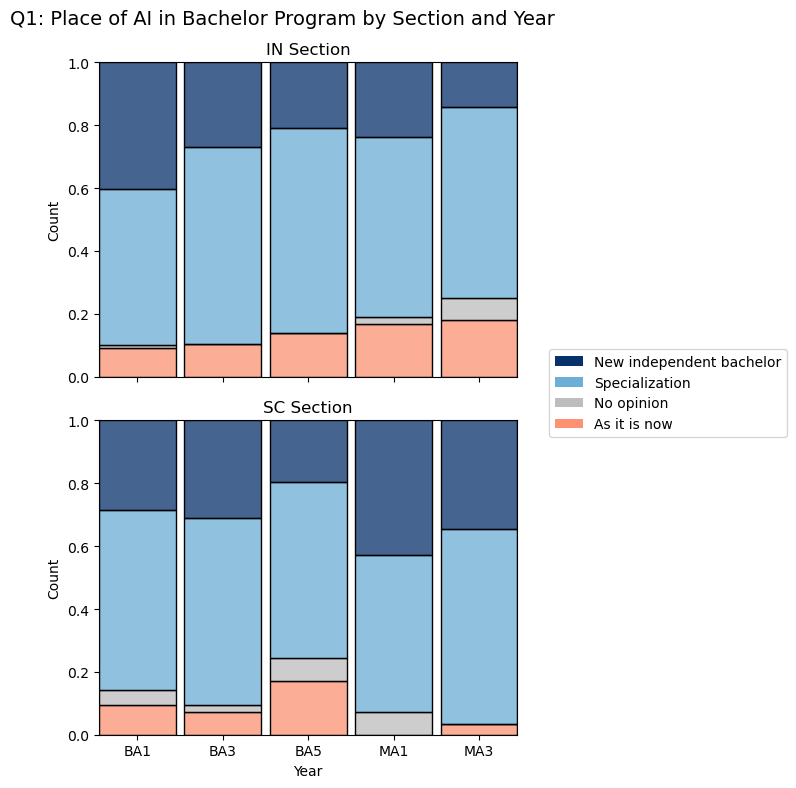

In [9]:
plot_Question(
    qst_column='Q1_AI_focus',
    title='Q1: Place of AI in Bachelor Program by Section and Year',
    answer_categories=["New independent bachelor","Specialization","No opinion","As it is now"],
    palette=mypalette[:4]
)

[<matplotlib.patches.Patch object at 0x169060e00>, <matplotlib.patches.Patch object at 0x1690604d0>, <matplotlib.patches.Patch object at 0x16912c6e0>, <matplotlib.patches.Patch object at 0x16912d580>, <matplotlib.patches.Patch object at 0x16912fef0>] ['Very relevant', 'Relevant', 'No opinion', 'A little Relevant', 'Not relevant at all']


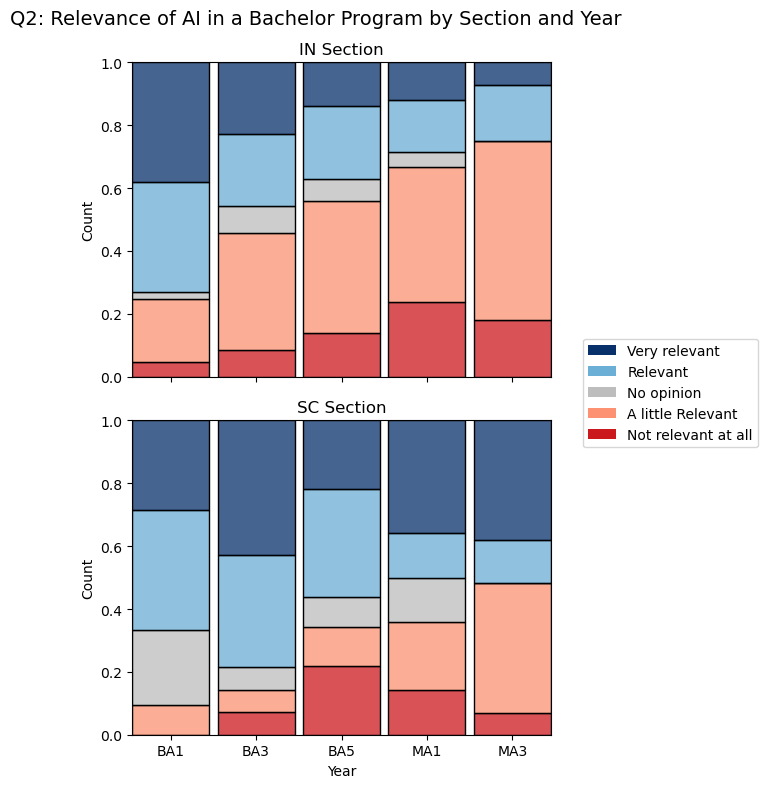

In [10]:
plot_Question(
    qst_column='Q2_AI_bachelor_relevance',
    title='Q2: Relevance of AI in a Bachelor Program by Section and Year',
    answer_categories=['Not relevant at all', 'A little Relevant', 'No opinion', 'Relevant', 'Very relevant'][::-1]
)

[<matplotlib.patches.Patch object at 0x1691d4590>, <matplotlib.patches.Patch object at 0x1691d42f0>, <matplotlib.patches.Patch object at 0x1691d4fb0>, <matplotlib.patches.Patch object at 0x1691d7bc0>, <matplotlib.patches.Patch object at 0x1691d7ec0>] ['Strongly agree', 'Agree', 'No opinion', 'Disagree', 'Strongly disagree']


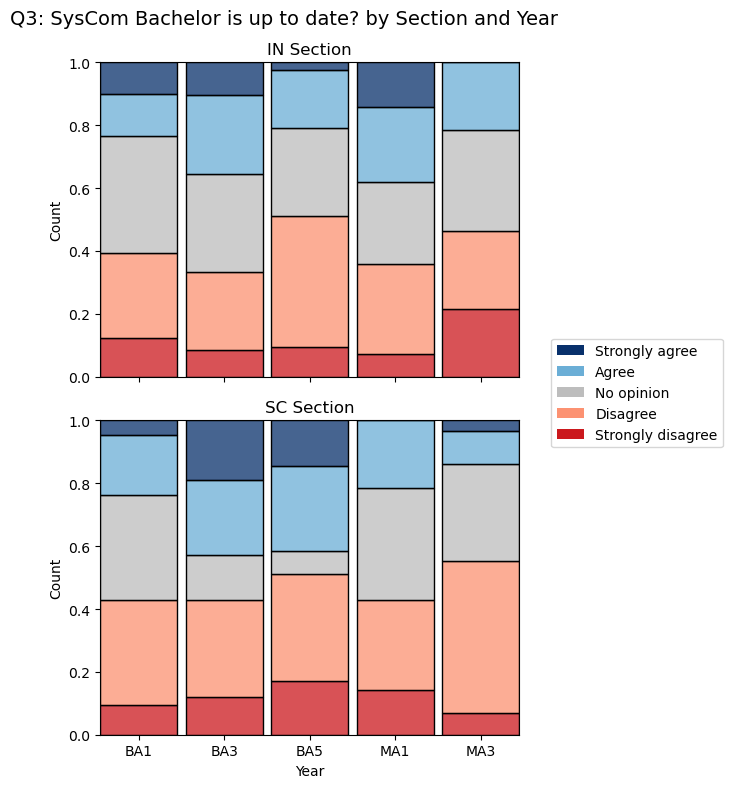

In [11]:
plot_Question(
    qst_column='Q3_SysCom_relevance',
    title='Q3: SysCom Bachelor is up to date? by Section and Year',
    answer_categories=['Strongly disagree','Disagree', 'No opinion', 'Agree', 'Strongly agree'][::-1]
)

[<matplotlib.patches.Patch object at 0x1692b3ce0>, <matplotlib.patches.Patch object at 0x1692b0ef0>, <matplotlib.patches.Patch object at 0x1692b24b0>, <matplotlib.patches.Patch object at 0x1692b23c0>, <matplotlib.patches.Patch object at 0x1692b0f50>] ['Strongly agree', 'Agree', 'No opinion', 'Disagree', 'Strongly disagree']


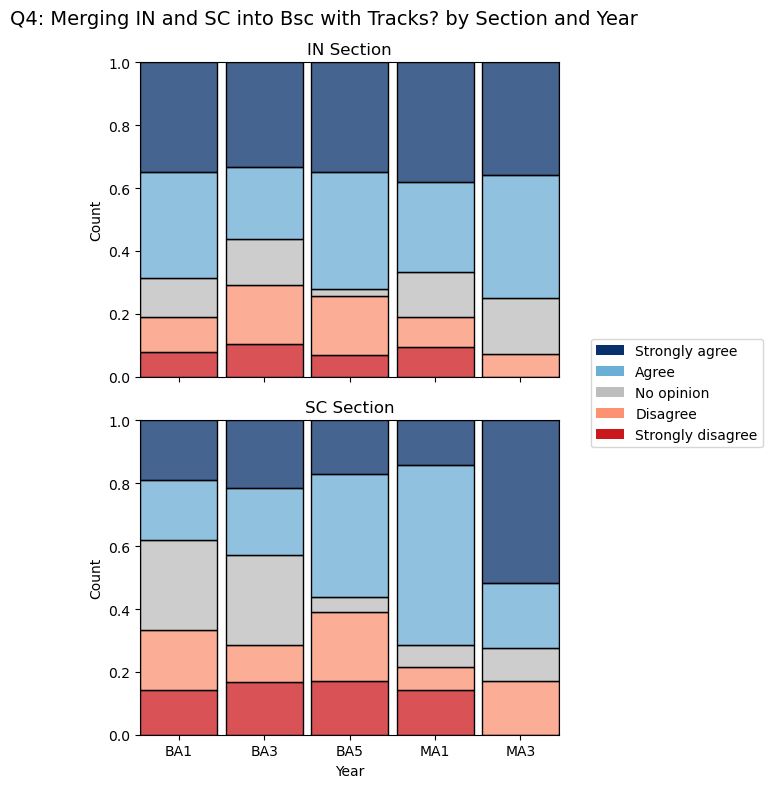

In [12]:
plot_Question(
    qst_column='Q4_IN_SC_merge',
    title='Q4: Merging IN and SC into Bsc with Tracks? by Section and Year',
    answer_categories=['Strongly disagree','Disagree', 'No opinion', 'Agree', 'Strongly agree'][::-1]
)

[<matplotlib.patches.Patch object at 0x16904b4a0>, <matplotlib.patches.Patch object at 0x1690494f0>, <matplotlib.patches.Patch object at 0x169048d40>, <matplotlib.patches.Patch object at 0x16904a8a0>] ['AI', 'Intelligent Systems', 'Data Science', 'Other']


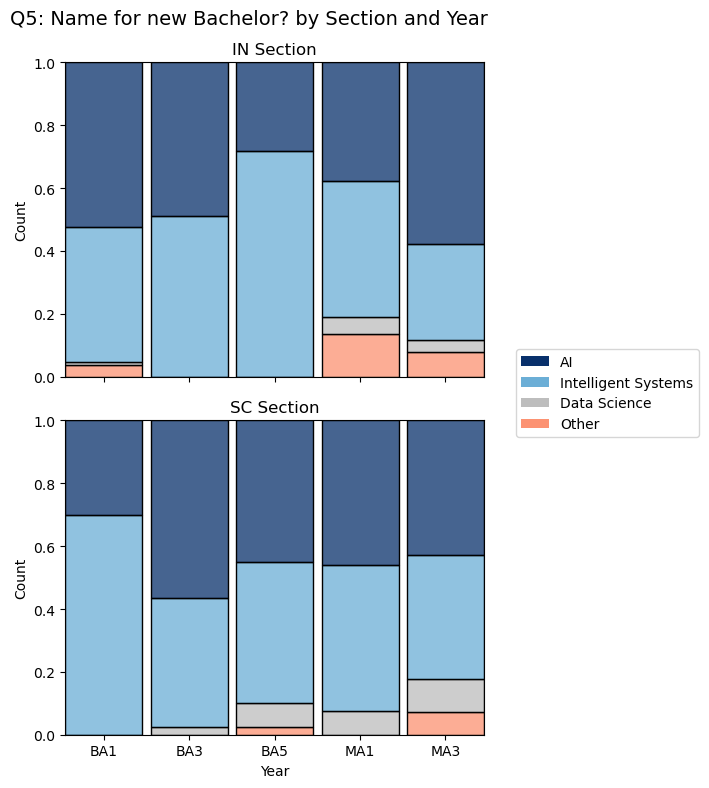

In [13]:
plot_Question(
    qst_column='Q5_Bachelor_name',
    title='Q5: Name for new Bachelor? by Section and Year',
    answer_categories=['AI', 'Intelligent Systems', 'Data Science', 'Other'],
    palette=mypalette[:4]
)

[<matplotlib.patches.Patch object at 0x169155f40>, <matplotlib.patches.Patch object at 0x169049790>, <matplotlib.patches.Patch object at 0x1690499a0>, <matplotlib.patches.Patch object at 0x1694ec6b0>, <matplotlib.patches.Patch object at 0x1694ee420>] ['5 – I love it !', '4', '3 - No opinion', '2', '1 – I hate it !']


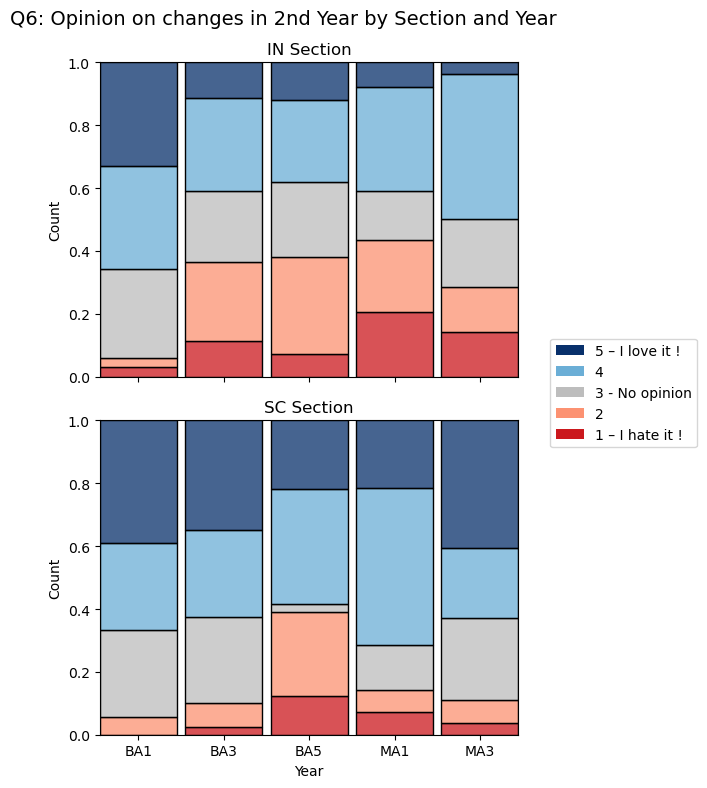

In [14]:
plot_Question(
    qst_column='Q6_2nd_year_changes',
    title='Q6: Opinion on changes in 2nd Year by Section and Year',
    answer_categories=['1 – I hate it !','2', '3 - No opinion','4', '5 – I love it !'][::-1],
    palette=mypalette
)

[<matplotlib.patches.Patch object at 0x168f3b1a0>, <matplotlib.patches.Patch object at 0x1694efbc0>, <matplotlib.patches.Patch object at 0x1694ef830>, <matplotlib.patches.Patch object at 0x169559b20>, <matplotlib.patches.Patch object at 0x1695595e0>] ['5 – I love it !', '4', '3 - No opinion', '2', '1 – I hate it !']


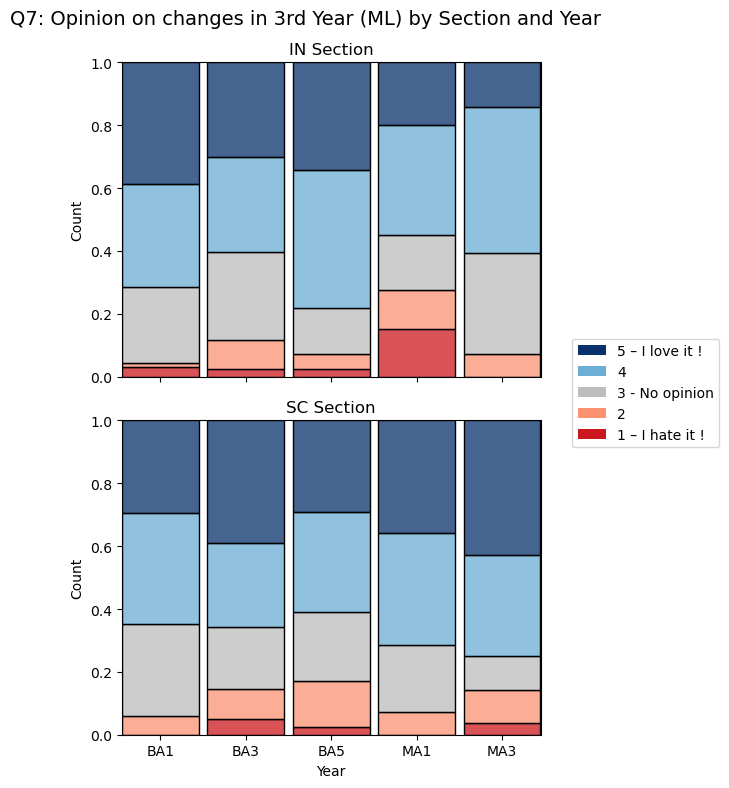

In [15]:
plot_Question(
    qst_column='Q7_3rd_year_changes_ML',
    title='Q7: Opinion on changes in 3rd Year (ML) by Section and Year',
    answer_categories=['1 – I hate it !','2', '3 - No opinion','4', '5 – I love it !'][::-1],
    palette=mypalette
)

[<matplotlib.patches.Patch object at 0x1696b65d0>, <matplotlib.patches.Patch object at 0x169559220>, <matplotlib.patches.Patch object at 0x1696878c0>, <matplotlib.patches.Patch object at 0x1692b03b0>, <matplotlib.patches.Patch object at 0x169792b70>] ['5 – I love it !', '4', '3 - No opinion', '2', '1 – I hate it !']


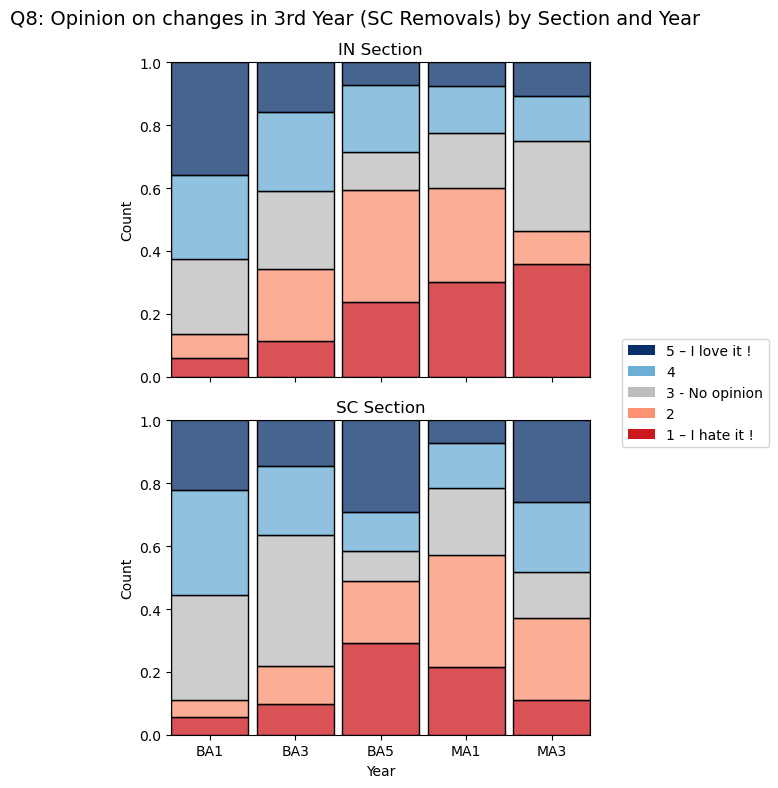

In [16]:
plot_Question(
    qst_column='Q8_3rd_year_changes_removals',
    title='Q8: Opinion on changes in 3rd Year (SC Removals) by Section and Year',
    answer_categories=['1 – I hate it !','2', '3 - No opinion','4', '5 – I love it !'][::-1],
    palette=mypalette
)

[<matplotlib.patches.Patch object at 0x16963b9b0>, <matplotlib.patches.Patch object at 0x1698e22a0>, <matplotlib.patches.Patch object at 0x1698e2270>] ['AI', 'Not sure', 'SysCom']


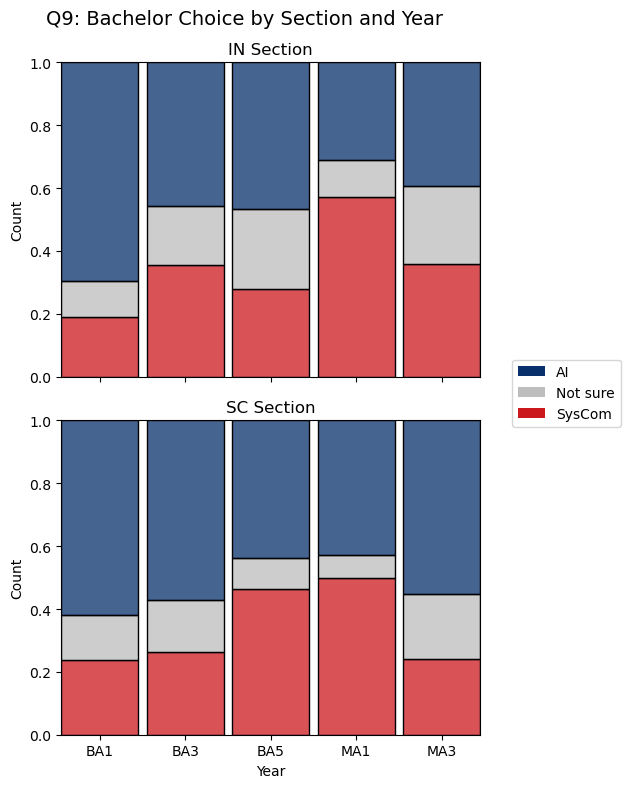

In [17]:
plot_Question(
    qst_column='Q9_Bachelor_choice',
    title='Q9: Bachelor Choice by Section and Year',
    answer_categories=['AI', 'Not sure', 'SysCom'],
    palette= mypalette[::2]
)